In [1]:
%load_ext zipline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


trading_calendar1: <<extension>.TwentyFourSevenCalendar object at 0x7fdcfae02890>
trading_calendar2: <<extension>.TwentyFourSevenCalendar object at 0x7fdcfae02890>
self.bm_symbol: BTC_USD
trading_calendar.day: <CustomBusinessDay>
trading_calendar.schedule.index: DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2017-11-22', '2017-11-23', '2017-11-24', '2017-11-25',
               '2017-11-26', '2017-11-27', '2017-11-28', '2017-11-29',
               '2017-11-30', '2017-12-01'],
              dtype='datetime64[ns, UTC]', length=701, freq='C')


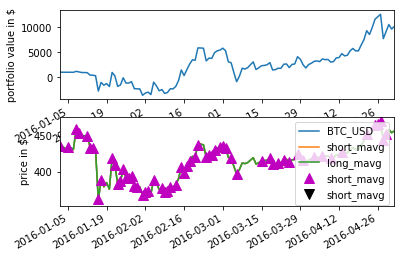

,BTC_USD,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2016-01-01 23:59:00+00:00,435.70,0.032799,0.002922,0.000000,0.012339,0.138503,0.236810,-432.778047,567.221953,435.70,...,435.686,0,0,NaN,1000.000000,0.00,0.00,1,"[{u'commission': None, u'amount': 1, u'sid': E...",0.0
2016-01-02 23:59:00+00:00,435.40,0.036157,0.002622,-0.037931,0.011735,0.145202,0.249009,0.000000,567.221953,435.40,...,435.392,0,0,98.423958,567.221953,435.70,435.70,2,[],0.0
2016-01-03 23:59:00+00:00,431.93,0.050663,-0.000848,-0.166292,0.003625,0.163524,0.306349,0.000000,567.221953,431.93,...,431.944,0,0,-2.211191,567.221953,435.40,435.40,3,[],0.0
2016-01-04 23:59:00+00:00,433.85,0.041739,-0.001828,-0.263468,0.008133,0.135985,0.287563,-1304.449900,-737.227947,1735.40,...,433.848,0,0,-3.999462,567.221953,431.93,431.93,4,"[{u'commission': None, u'amount': 1, u'sid': E...",0.0
2016-01-05 23:59:00+00:00,433.34,0.037867,-0.003868,-0.298688,0.006901,0.120042,0.294976,0.000000,-737.227947,1733.36,...,433.294,0,0,-6.610724,-737.227947,1735.40,1735.40,5,[],0.0
2016-01-06 23:59:00+00:00,431.47,0.055255,-0.011348,-0.482695,0.000163,0.119491,0.398509,0.000000,-737.227947,1725.88,...,430.402,0,0,-8.590759,-737.227947,1733.36,1733.36,6,[],0.0
2016-01-07 23:59:00+00:00,459.26,1.177807,0.180674,-0.088504,0.066736,0.413712,2.771369,-9563.598269,-10300.826216,11481.50,...,459.510,0,0,127.891321,-737.227947,1725.88,1725.88,7,"[{u'commission': None, u'amount': 1, u'sid': E...",0.0
2016-01-08 23:59:00+00:00,454.53,1.302144,0.061797,-2.872728,0.055978,0.398566,3.053237,-1364.216644,-11665.042860,12726.84,...,454.348,0,0,4.563780,-10300.826216,11481.50,11481.50,8,"[{u'commission': None, u'amount': 1, u'sid': E...",0.0
2016-01-09 23:59:00+00:00,450.36,1.374196,-0.054963,-5.162009,0.046544,0.382354,3.272123,0.000000,-11665.042860,12610.08,...,450.332,0,0,-0.984855,-11665.042860,12726.84,12726.84,9,[],0.0
2016-01-10 23:59:00+00:00,449.99,1.296207,-0.065323,-4.833253,0.045637,0.361820,3.257420,0.000000,-11665.042860,12599.72,...,449.986,0,0,-1.299310,-11665.042860,12610.08,12610.08,10,[],0.0


In [3]:
%%zipline -b custom-csvdir-bundle --trading-calendar TWENTYFOURSEVEN --data-frequency minute --start 2016-1-1 --end 2016-5-1 --capital-base 1000 -o short_long_btc.pickle


from zipline.api import order_target, record, symbol, set_benchmark
import matplotlib.pyplot as plt

def initialize(context):
    set_benchmark(symbol('BTC_USD'))
    context.i = 0
    context.asset = symbol('BTC_USD')


def handle_data(context, data):
    # Skip first 10 mins to get full windows
    context.i += 1
    if context.i < 10:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=5, frequency="1m").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=10, frequency="1m").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(BTC_USD=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)


def analyze(context, perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

    ax2 = fig.add_subplot(212)
    perf['BTC_USD'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.ix[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.ix[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    plt.show()